# Vrinda Clothing Studio - Analysis

## Client Background:
Vrindha Clothing Studio is a boutique specializing in apparel retail. Established in 2018, it began operations on a modest scale, catering to the growing demand for fashion-forward clothing. The studio curates a diverse range of apparel, encompassing traditional Indian attire, contemporary western wear, and fusion ensembles.

With a commitment to quality and style, Vrindha Clothing Studio has steadily expanded its reach beyond brick-and-mortar retail, leveraging various e-commerce platforms to showcase and sell its products. This strategic move has enabled the studio to tap into a broader customer base, capitalizing on the growing trend of online shopping.
## Underlying Business Objective:
As the brand continues to evolve and innovate it aims to optimize its product offerings and marketing strategies to enhance sales performance and maximize profitability through various e-commerce platforms. However, the lack of comprehensive insights into customer preferences, purchasing behavior, and market trends the studio struggles to effectively target its audience, refine its product assortment, and allocate resources efficiently.

As a data science consultant for our client, leveraging order history data including product details, location, purchase amounts, preferred purchasing platforms, and customer demographics such as gender becomes crucial. Through comprehensive exploratory data analysis, I aim to uncover key insights into customer preferences and market trends. These insights will empower Vrindha Clothing Studio to make informed strategic decisions, enhance customer engagement strategies, and ensure sustained growth in the dynamic and competitive fashion industry.

## Defining Business Questions
#### Q1. What insights can we extract from the distribution of gender within our customer base, and how might these insights influence our marketing strategies and customer engagement initiatives?
#### Q2. What are the top-selling apparel categories, and how does the gender breakdown of customers influence their purchasing behavior within these categories?
#### Q3. What regional characteristics or market dynamics distinguish the top-performing states from others, and how can we achieve more balanced sales growth across all tier states?
#### Q4. What is the distribution of gender within different age groups among customers, and does this distribution suggest any gender-specific patterns or preferences?
#### Q5. What factors contribute to the distribution of order statuses among our customers, and how can we leverage these insights to optimize our order fulfillment process and enhance customer satisfaction?
#### Q6. What insights can we gain from the distribution of ordered channels among our customers, and how can we strategically allocate resources to optimize each channel's performance and maximize overall sales revenue?
#### Q7. In which months do we observe spikes or dips, and what factors contribute to these fluctuations? How can we capitalize on months with high revenue to drive further growth and mitigate challenges during low-revenue periods?

## Importing Warnings and Libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime as d
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', None,'display.max_columns',None)

#### Importing the necessary libraries for the analysis purpose.
- Pandas is used to upload the dataset, perform manipulation and analysis
- Numpy helps to compute multi-dimensional arrays
- Datetime handles the dates and times in diverse formates for manipulation
- Matplotlib and seaborn are used for visualization purposes to get interactive informative insights
- Matplotlib inline allows plots to be displayed directly within the notebook
- To display all the rows and columns using the set_option function

## Data Understanding

In [8]:
cv = pd.read_excel("Vrinda Store Data Analysis.xlsx")
cv.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,2022-12-04,Delivered,Myntra,JNE1233-BLUE-KR-031-XXL,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,2022-12-04,Delivered,Ajio,SET414-KR-NP-L,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,2022-12-04,Delivered,Myntra,SET261-KR-PP-S,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,2022-12-04,Delivered,Amazon,SET110-KR-PP-M,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,2022-12-04,Delivered,Myntra,JNE2294-KR-A-XXL,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [9]:
cv.shape

(31047, 19)

- Checking the number of rows and columns in the data set with the help of shape to find that there are 31047 rows and 19 columns.
- Reading the vrinda dataset as "cv".

In [11]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  object        
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-city         3104

- The cv dataset is used for further exploration and analysis.
- Using the info function checking basic information like the null values and datatypes of the columns. Infering that there are no null values in the columns.

In [13]:
cv.describe(include='number')

,index,Cust ID,Age,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,3036.000000,855117.000000


- Describe function provides an overview of the statistical summary of numerical columns inorder to analyse the count, mean, lowest and highest values of the columns in the dataset.

## Data Cleaning

In [16]:
cv[cv.duplicated(keep=False)]

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B


- Duplicate function helped to ensure that there are no duplicate values in the data.

In [18]:
cv.nunique()

index               31047
Order ID            28471
Cust ID             28437
Gender                  4
Age                    61
Date                   36
Status                  4
Channel                 7
SKU                  5287
Category                8
Size                   11
Qty                     7
currency                1
Amount                769
ship-city            2603
ship-state             50
ship-postal-code     4958
ship-country            1
B2B                     2
dtype: int64

- The nunique function provides the number of unique values in each column and from the above noticing that there are some abnormalities in Gender, ship-city, ship-state and Quantity columns which will be delt in the following steps.

### Gender column

In [21]:
cv['Gender'].value_counts()

Gender
Women    21479
Men       9452
W           74
M           42
Name: count, dtype: int64

- The value counts function provides us a count of each value in the column. Since Gender column had 4  unique values after checking it is found that M and W are entered along with Men and Women.

In [23]:
cv['Gender'] = cv['Gender'].replace("W","Women")
cv['Gender'] = cv['Gender'].replace("M","Men")

- Replacing W and M as Women and Men respectively using replace function.

### City and State columns

In [26]:
cv['ship-city'] = cv['ship-city'].str.title()
cv['ship-state'] = cv['ship-state'].str.title()

- Using the title function to capitalize the first letter in every word to reduce redundancy in the columns.

In [28]:
cv['ship-state'] = cv['ship-state'].replace('Delhi', 'New Delhi')

- Replacing the value "Delhi" to "New Delhi" since both are similar.

### Quantity column

In [31]:
cv['Qty'].value_counts()

Qty
1      30878
2        114
3         19
Two       16
One       13
4          6
5          1
Name: count, dtype: int64

- Checking the value counts for the column Qty since its datatype was shown as object instead of integer. Inferring that the values "One" and "Two" has to be handled.

In [33]:
cv['Qty'] = cv['Qty'].replace("One",1)
cv['Qty'] = cv['Qty'].replace("Two",2)

- Replacing One and Two as 1 and 2 respectively. Checking the value counts and datatype for the column Qty after replacing.

### Grouping

In [36]:
cv['Age_group'] = pd.cut(cv['Age'], 
                         bins=[10,40,60,100], 
                         labels=["Young", "Middle-aged", "Seniors"])
cv['Age_group'].value_counts()

Age_group
Young          17955
Middle-aged     9346
Seniors         3746
Name: count, dtype: int64

- Creating a new column named Age_group to categorize the values in Age column as Young(10 to 40), Middle-Aged(40 to 60) and Seniors(60 to 100). This helps better understanding of transactions.

In [38]:
cv['Month'] = cv['Date'].dt.month_name()
cv['Month'].value_counts()

Month
March        2819
February     2750
January      2702
April        2685
August       2617
May          2617
June         2597
July         2579
September    2490
October      2424
December     2384
November     2383
Name: count, dtype: int64

- A new column "Month" is created to store the order month data from the date column using the datetime function.

In [40]:
state_count = cv['ship-state'].value_counts()

tier1_states = state_count[state_count > 1000].index.tolist()
tier2_states = state_count[(state_count >= 100) & (state_count <= 1000)].index.tolist()
tier3_states = state_count[state_count < 100].index.tolist()

cv['state_tier'] = np.where(cv['ship-state'].isin(tier1_states), 'Tier 1',
                            np.where(cv['ship-state'].isin(tier2_states), 'Tier 2', 'Tier 3'))
cv['state_tier'].value_counts()

state_tier
Tier 1    24957
Tier 2     5532
Tier 3      558
Name: count, dtype: int64

- Introducing the column state_tier to segregate the states based on their count for analysis purposes.

### Outliers

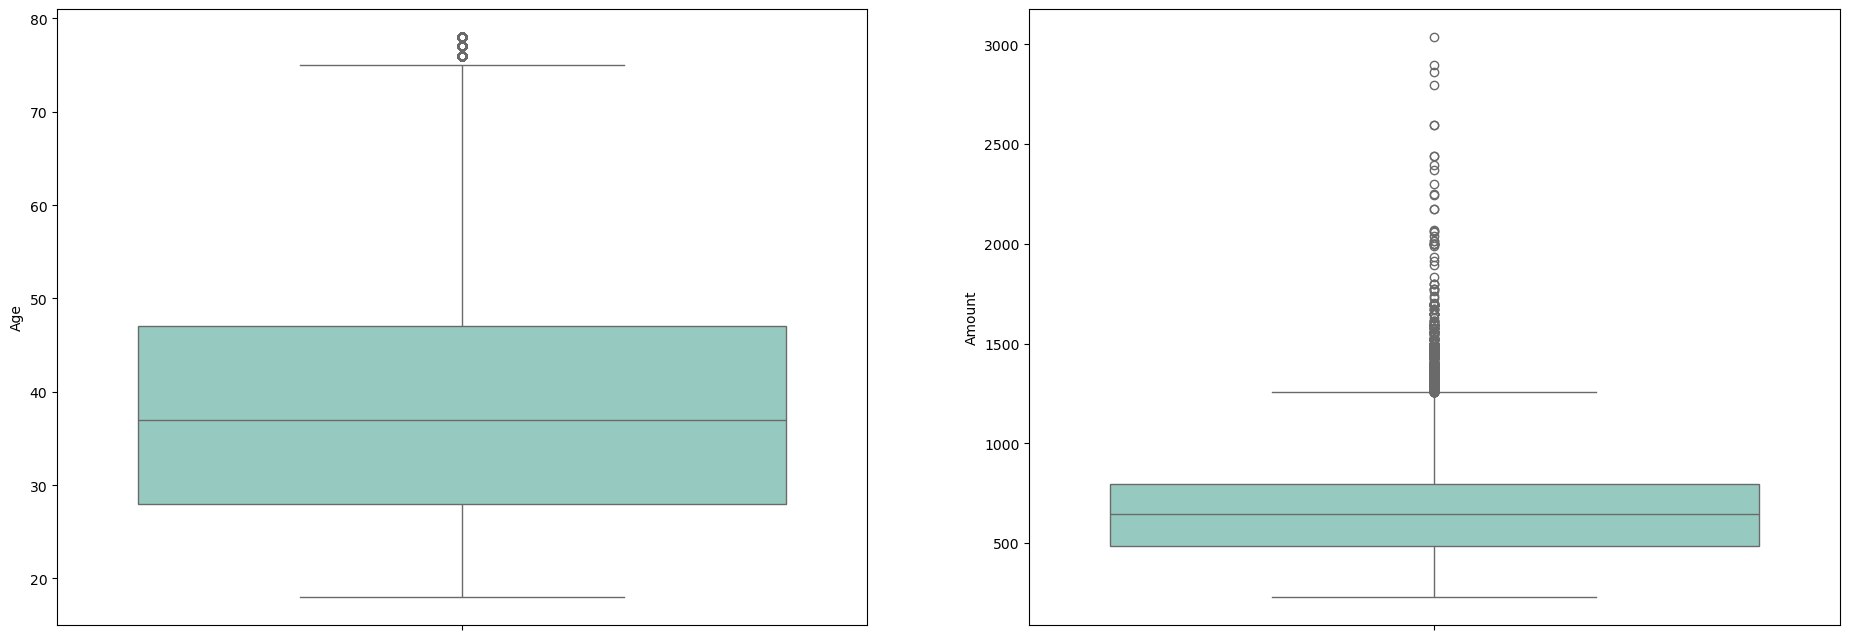

In [43]:
plt.figure(figsize=(23, 8))
plt.subplot(1,2,1)
sns.boxplot(y = 'Age', palette='Set3', data = cv)
plt.subplot(1,2,2)
sns.boxplot(y = 'Amount', palette='Set3', data = cv)
plt.show()

- Checking the outliers in the numeric columns, found that there arent much outliers to be handled.

## Explanatory Data Analysis

### Q1. Gender Distribution Analysis

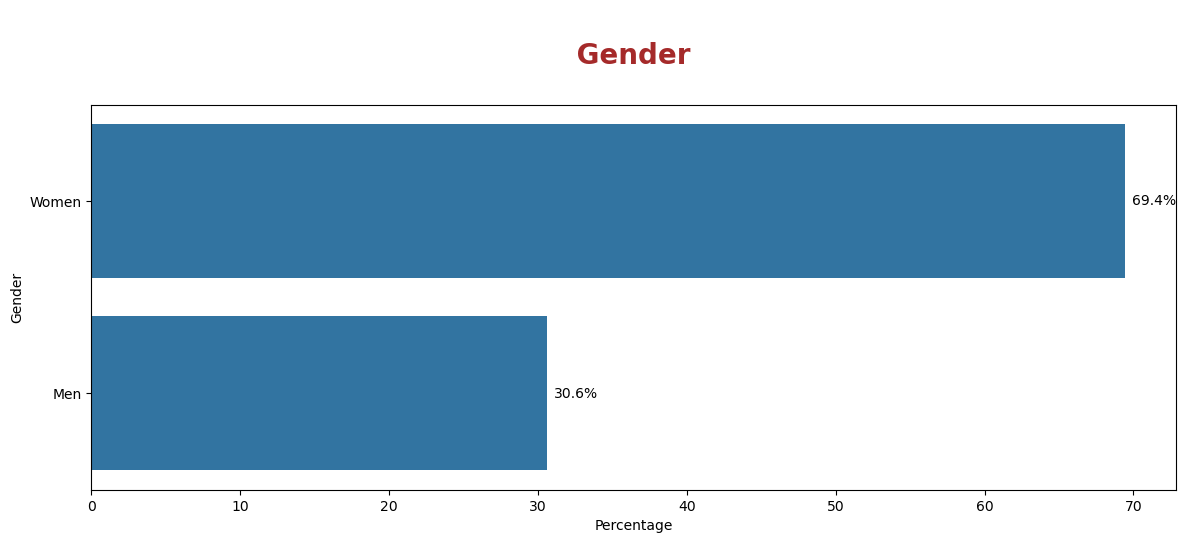

In [47]:
gender_percent = cv['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize = (14,5))
ax = sns.barplot(x=gender_percent.values, y=gender_percent.index)

for index, value in enumerate(gender_percent):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.title("\n Gender \n", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.show()







Creating a bar chart showing the percentage of each gender in the dataset.





### Suggestions:
- With a significant majority of our customers being women with 69.4%, we should continue tailoring our marketing campaigns to cater to their preferences, interests, and shopping behaviors to retain. However, there may be untapped opportunities for market expansion among male shoppers. 
- By conducting further market research and understanding the specific needs and preferences of male customers, we can develop targeted strategies to attract and improve this segment. By introducing new product lines, collaborating with influencers or brands that appeal to men, and creating unique shopping experiences tailored to their interests which ultimately fuel business growth.

### Q2. Top-Selling Apparel Categories Analysis

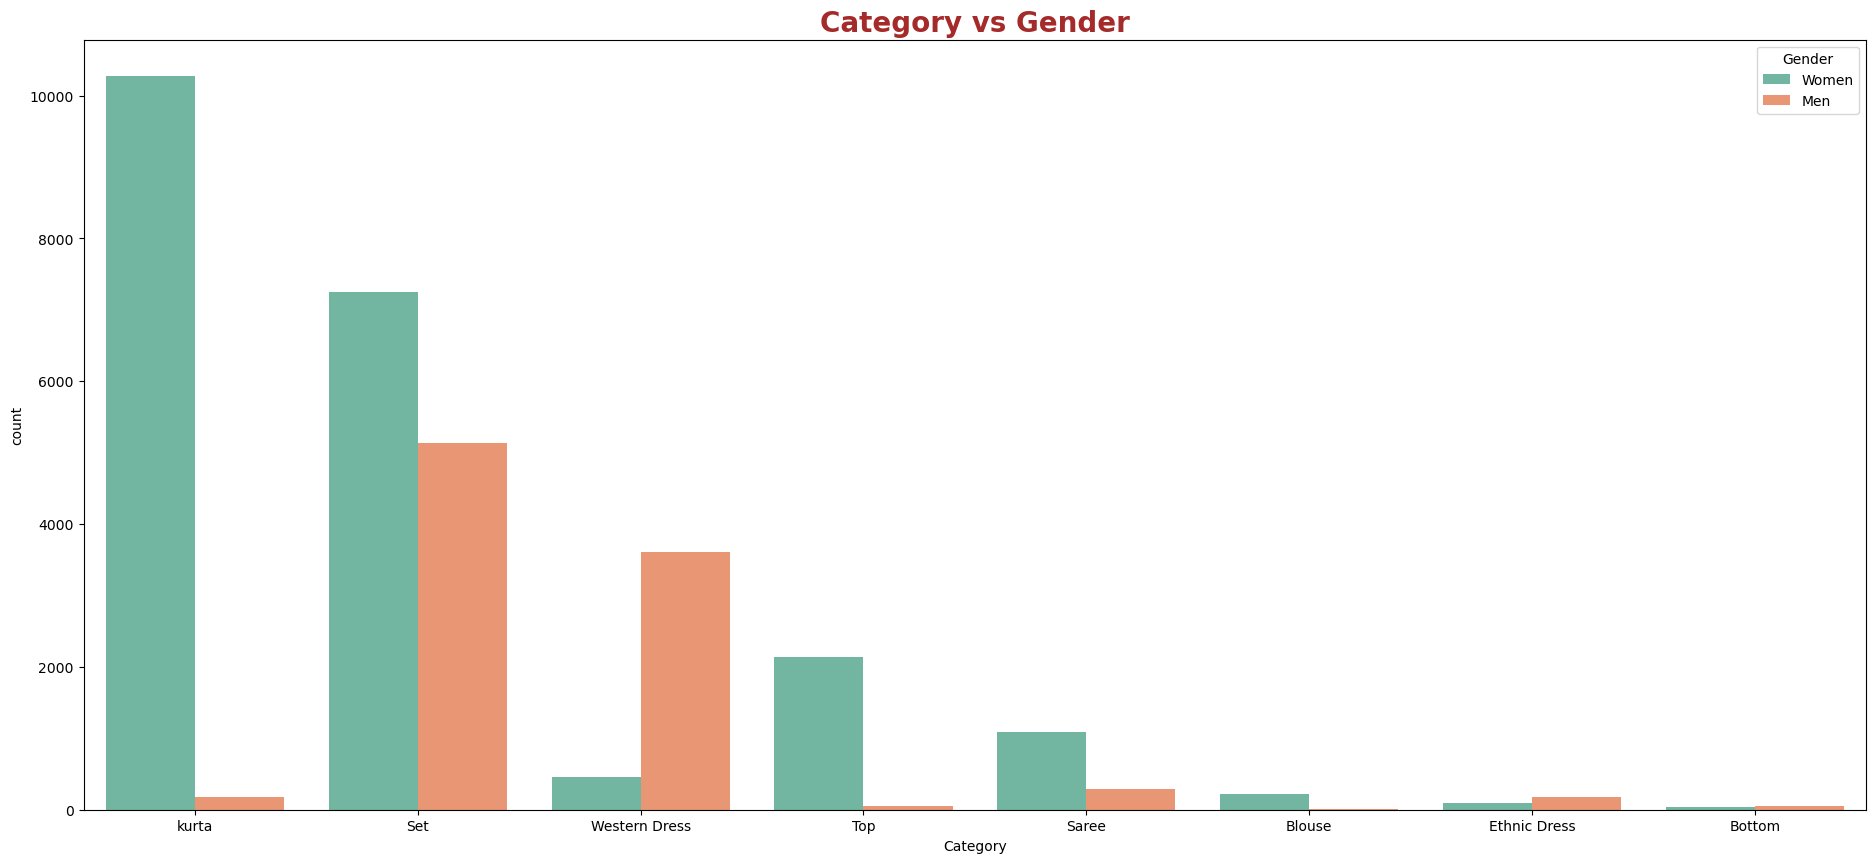

In [51]:
plt.figure(figsize=(23, 10))
sns.countplot(x='Category', hue='Gender', data=cv, palette = 'Set2')

plt.title("Category vs Gender", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.legend(title='Gender')
plt.show()







Generating a countplot showing the distribution of categories with respect to gender in the dataset. This visualization offers insights into how categories are distributed among different genders.





### Suggestions:
- This graph indicates that certain apparel categories such as Kurta, Set, and Western dresses are top-selling items, while other categories may not be moving as quickly. By collaborating with renowned designers or brands known for their expertise in men's and women's fashion, we can leverage their brand equity and design expertise to introduce exclusive collections to cater broader customers.
- We can consider introducing a dedicated kids' section featuring children's apparel and accessories. By offering a diverse selection of clothing options for children, we can attract parents looking for high-quality and stylish clothing options for their children, which would help to drive traffic.

### Q3. Regional Market Dynamics Analysis

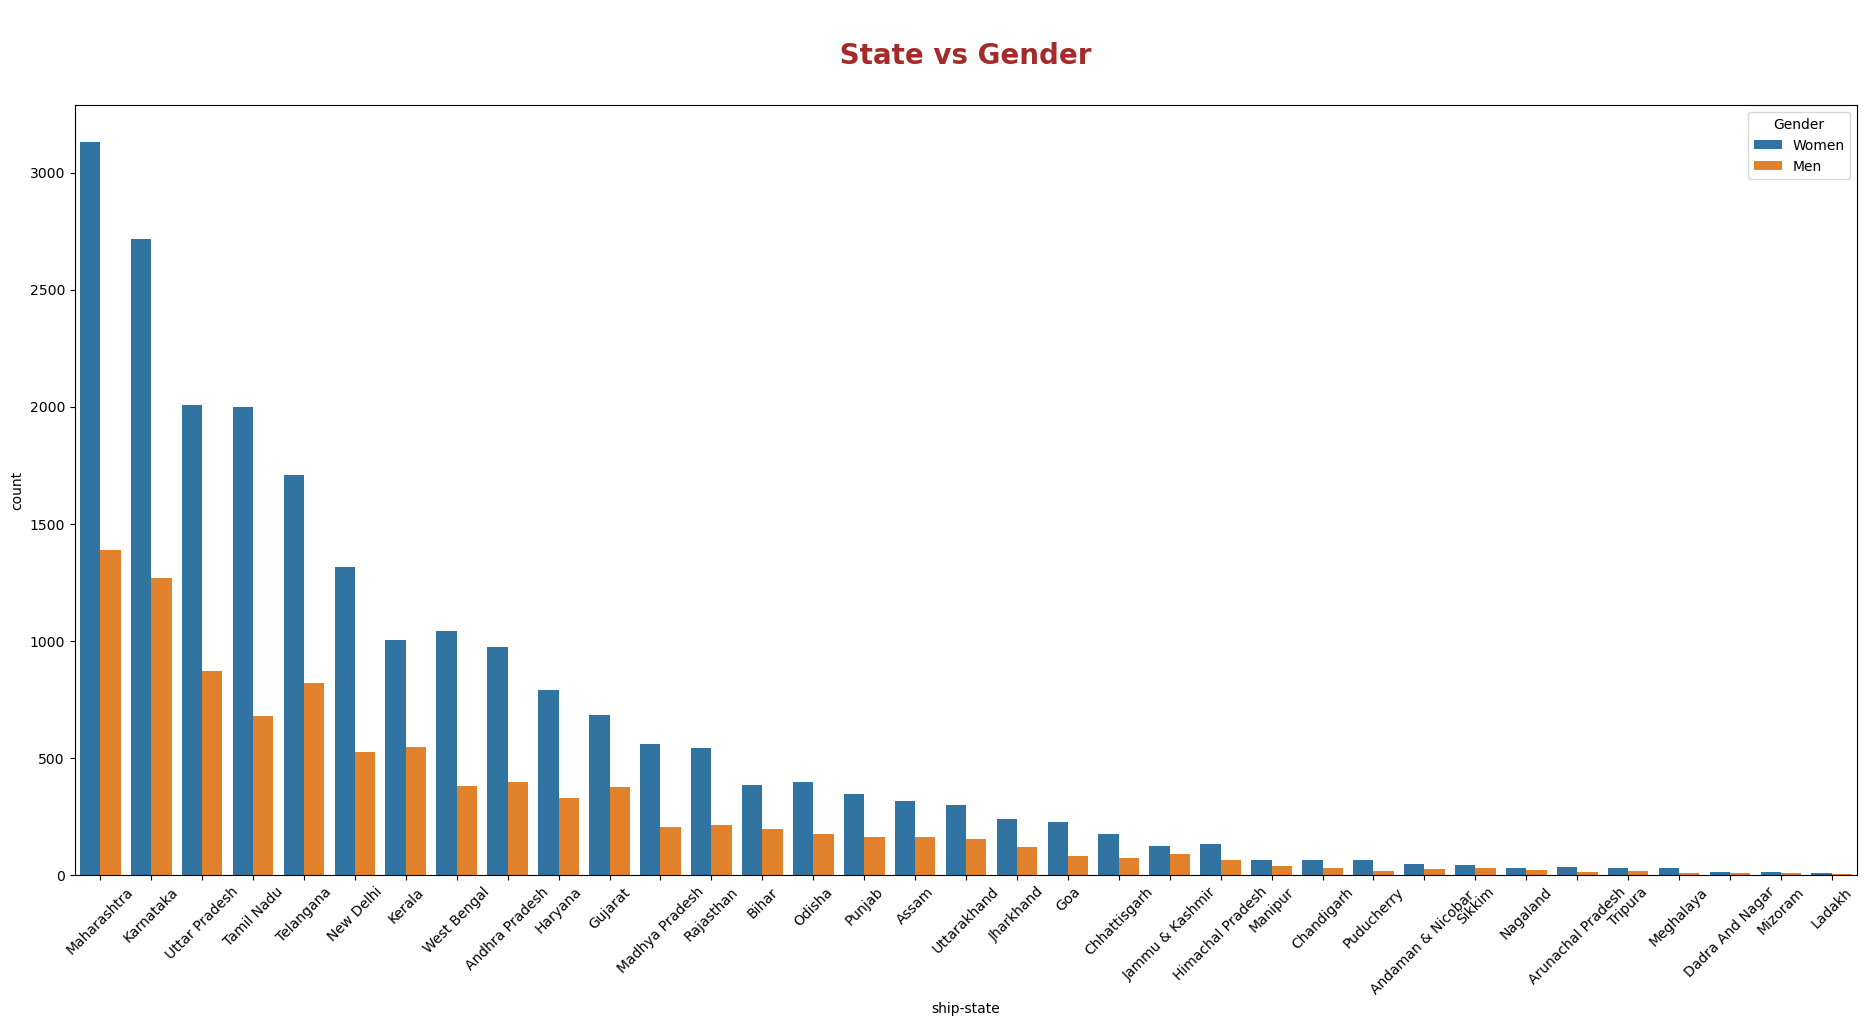

In [55]:
plt.figure(figsize = (23,10))
sns.countplot(x = cv['ship-state'], hue = 'Gender', data = cv, order = cv['ship-state'].value_counts().index)

plt.title("\n State vs Gender \n", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.xticks(rotation = 45)
plt.show()







Generating a bar chart depicting the distribution of genders across various states in the dataset. It organizes the states based on their frequency of occurrence and creates bars for each state. This visualization offers insights into how genders are distributed geographically across states in the dataset.





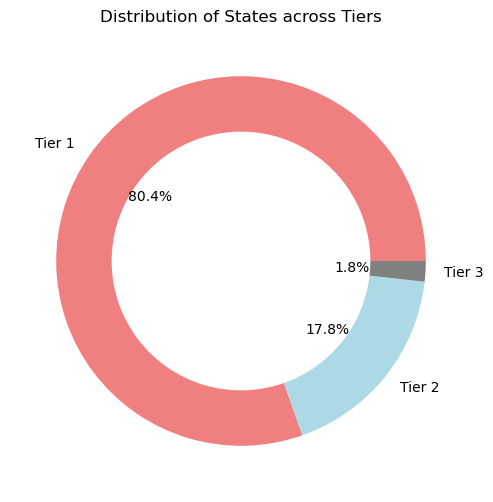

In [57]:
tier_counts = cv['state_tier'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'lightblue', 'gray'], wedgeprops=dict(width=0.3))
plt.title('Distribution of States across Tiers')
plt.show()







A donut chart to display the distribution of states across tiers in the dataset. The chart segments represent the counts of states in each tier, labeled with their respective percentages. Overall, this visualization offers a clear representation of how states are distributed among different tiers.





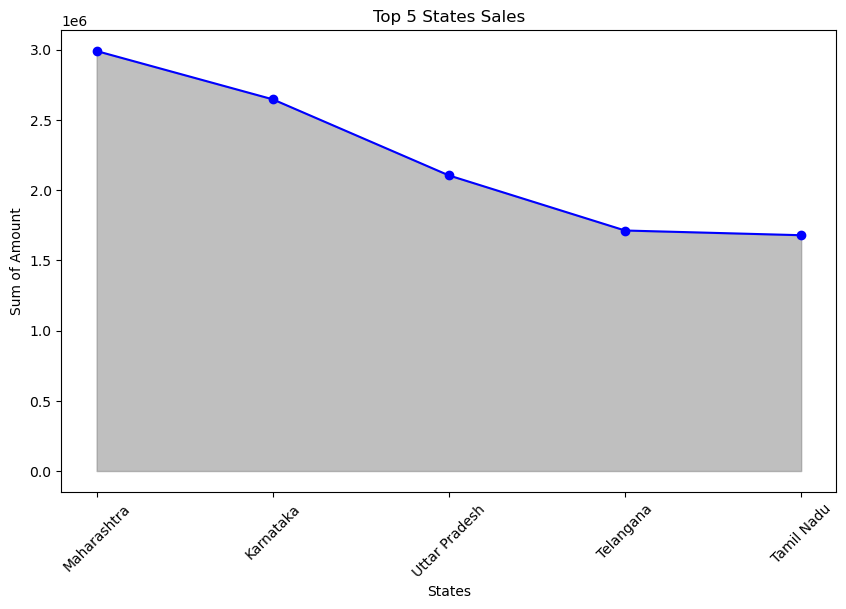

In [59]:
state_amount_sum = cv.groupby('ship-state')['Amount'].sum()
sorted_data = state_amount_sum.sort_values(ascending=False)

top_states = sorted_data.index[:5]
top_amounts = sorted_data.values[:5]

plt.figure(figsize=(10, 6))
plt.fill_between(top_states, top_amounts, color='gray', alpha=0.5)
plt.plot(top_states, top_amounts, marker='o', color='blue')

plt.xlabel('States')
plt.ylabel('Sum of Amount')
plt.title('Top 5 States Sales')
plt.xticks(rotation=45)
plt.show()







A filled line plot to visualize the total amount of sales in the top five states. Overall, this plot provides a clear comparison of sales amounts across the top five states, allowing for easy identification of the highest performing states.





### Suggestions:
- It is evident that the higher demand is in tier 1 cities. However, to expand our reach and capture wide market share in tier 2 and tier 3 cities, we need to outreach initiatives specifically designed to resonate with customers in these areas. This might involve leveraging local language advertising, collaborating with regional influencers or celebrities, and participating in community events will raise brand awareness, eventually it help us to tap into existing networks and reach new customer segments to boost business.

### Q4. Gender Distribution and Quantity Analysis by Age Groups

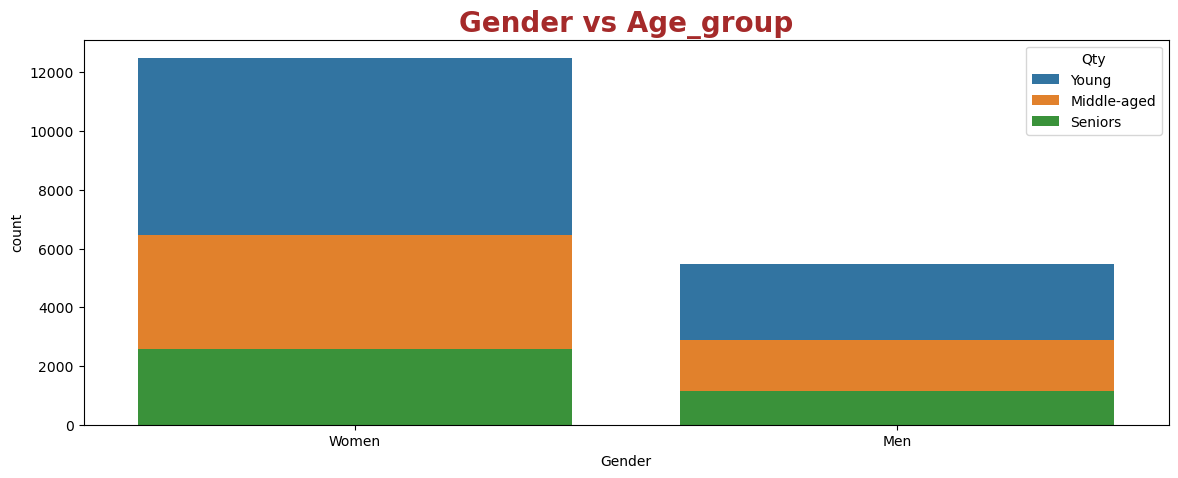

In [63]:
plt.figure(figsize=(14, 5))
sns.countplot(x = 'Gender', hue = 'Age_group', data = cv, dodge=False)

plt.title("Gender vs Age_group", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.legend(title='Qty')
plt.show()







A grouped bar plot illustrating the distribution of age groups within each gender category in the dataset. This visualization helps in understanding the age distribution across genders in the dataset.





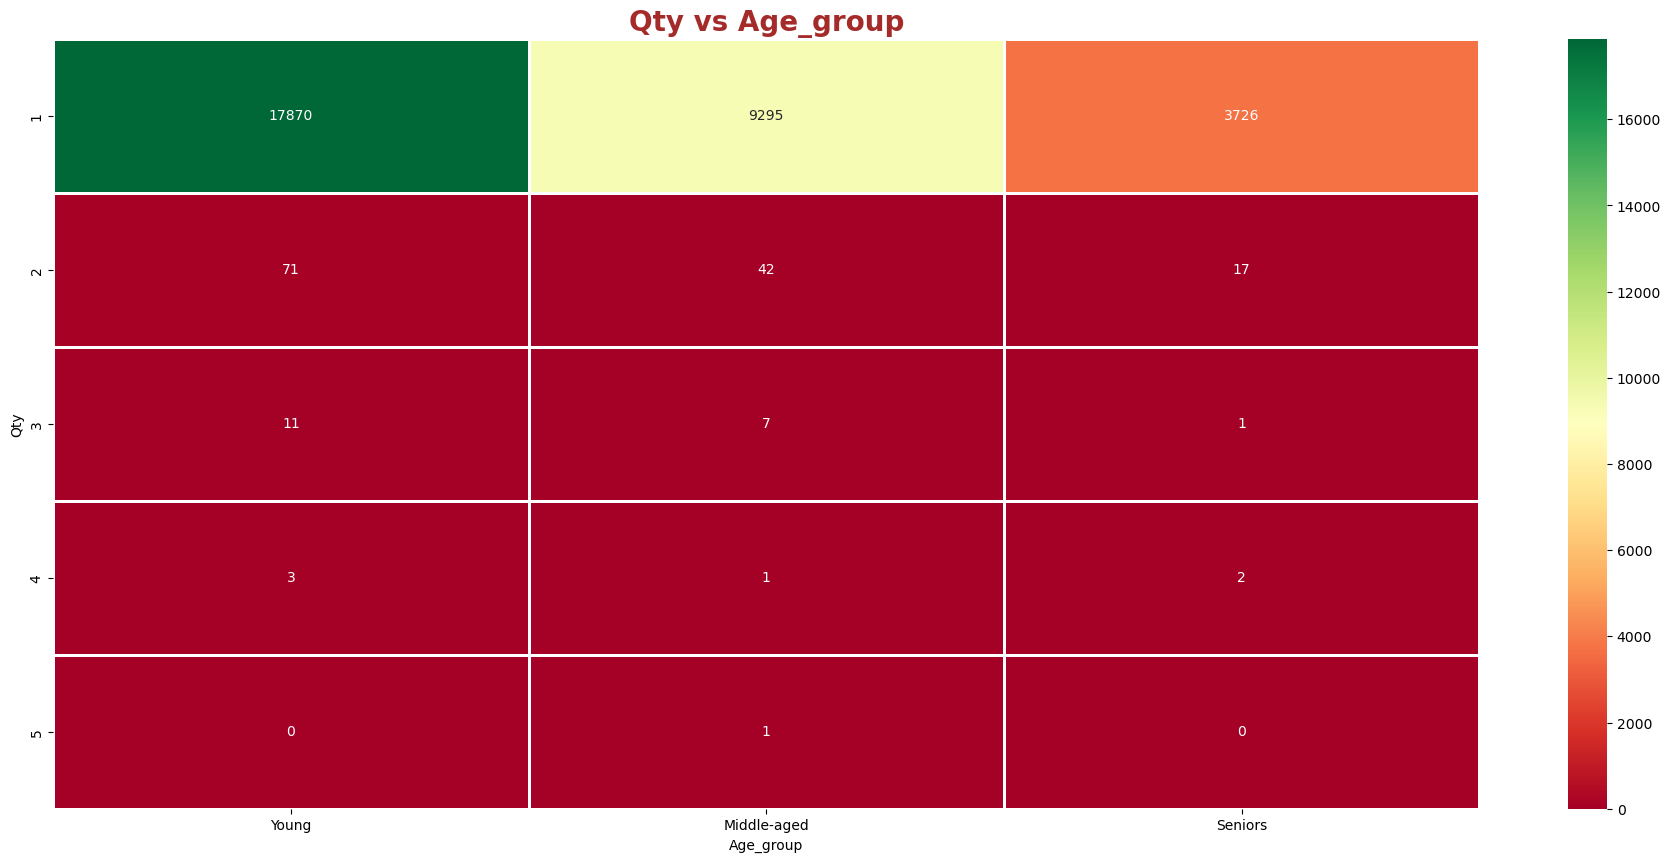

In [65]:
plt.figure(figsize=(23, 10))
pivot_table = cv.pivot_table(index='Qty', columns='Age_group', aggfunc='size')
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='RdYlGn', linewidth=1)

plt.title("Qty vs Age_group", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.show()







A heatmap to visualize the relationship between quantity ('Qty') and age group in the dataset. A pivot table where the rows represent quantity and the columns represent age group, with the values being the count of occurrences. The 'RdYlGn' colormap is used to indicate high and low counts with red and green colors, respectively. Overall, this heatmap helps in understanding the distribution of quantities across different age groups.





### Suggestions:
- Most of our buyers are young adults. However, there are still significant opportunities within the middle-aged adult and senior demographics. We can explore opportunities for cross-generational promotions and campaigns by conducting events near IT working campus and near community apartments can encourage intergenerational shopping among customers across the lifespan.
- Also, we can see that majority of our buyers are buying single items. In order to increase the quantity of items during shopping we can provide family-oriented discounts or bundling products.

### Q5. Order Status Distribution Analysis

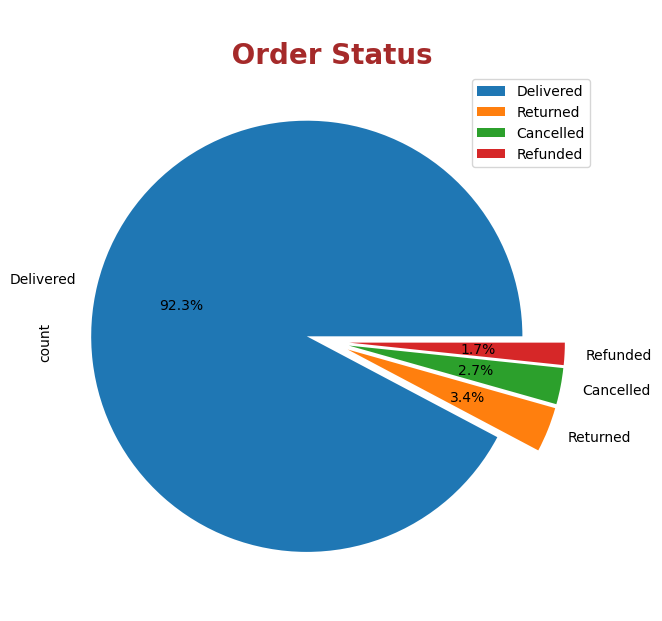

In [69]:
plt.figure(figsize = (14,7))
explode = (0.1, 0.1, 0.1, 0.1)
cv['Status'].value_counts().plot.pie(autopct = '%1.1f%%', legend = 'None', explode = explode)

plt.title("\n Order Status", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.show()







Making a pie chart showing the percentage breakdown of different order statuses in the dataset and adds a bit of separation between sections, and displays percentages with one decimal place.





#### Suggestions:
- Given that the vast majority of orders are successfully delivered and the relatively low percentages of cancellations and refunds indicate that these issues are less prevalent but still warrant attention. 
- Investing in automated order processing systems, optimizing inventory management processes, and enhancing communication channels with logistics partners to minimize delays, errors in order delivery addressing underlying issues can help minimize cancellations and refunds, thereby enhancing overall customer satisfaction.

### Q6. Analysis of Ordered Channels Distribution

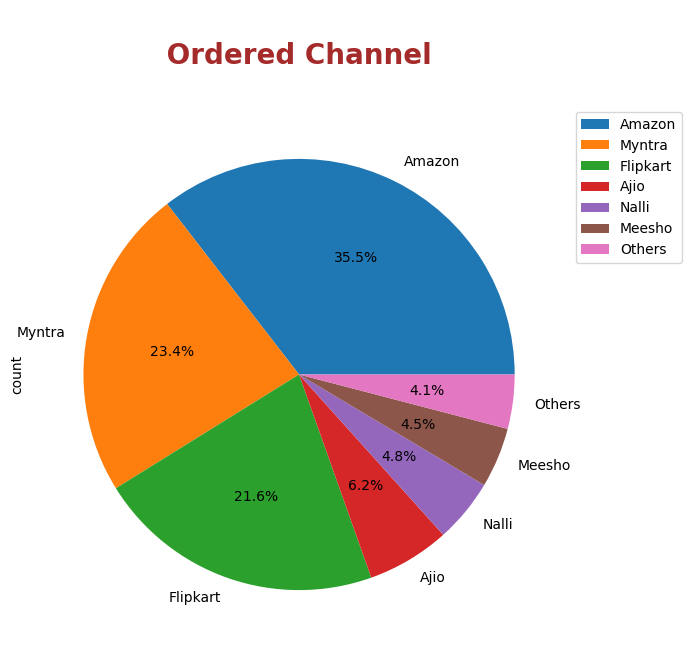

In [73]:
plt.figure(figsize = (14,7))
cv['Channel '].value_counts().plot.pie(autopct = '%1.1f%%')

plt.title("\n Ordered Channel \n", fontdict={"fontsize": 20, "fontweight": "bold", "color": "brown"})
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

A pie chart visualization offers a clear depiction of how orders are distributed among different channels.

#### Suggestions:
- Collaborating with influencers or brands featured on Myntra or Flipkart can help drive traffic and sales to our products in other emerging platforms.

### Q7. Monthly Revenue Analysis

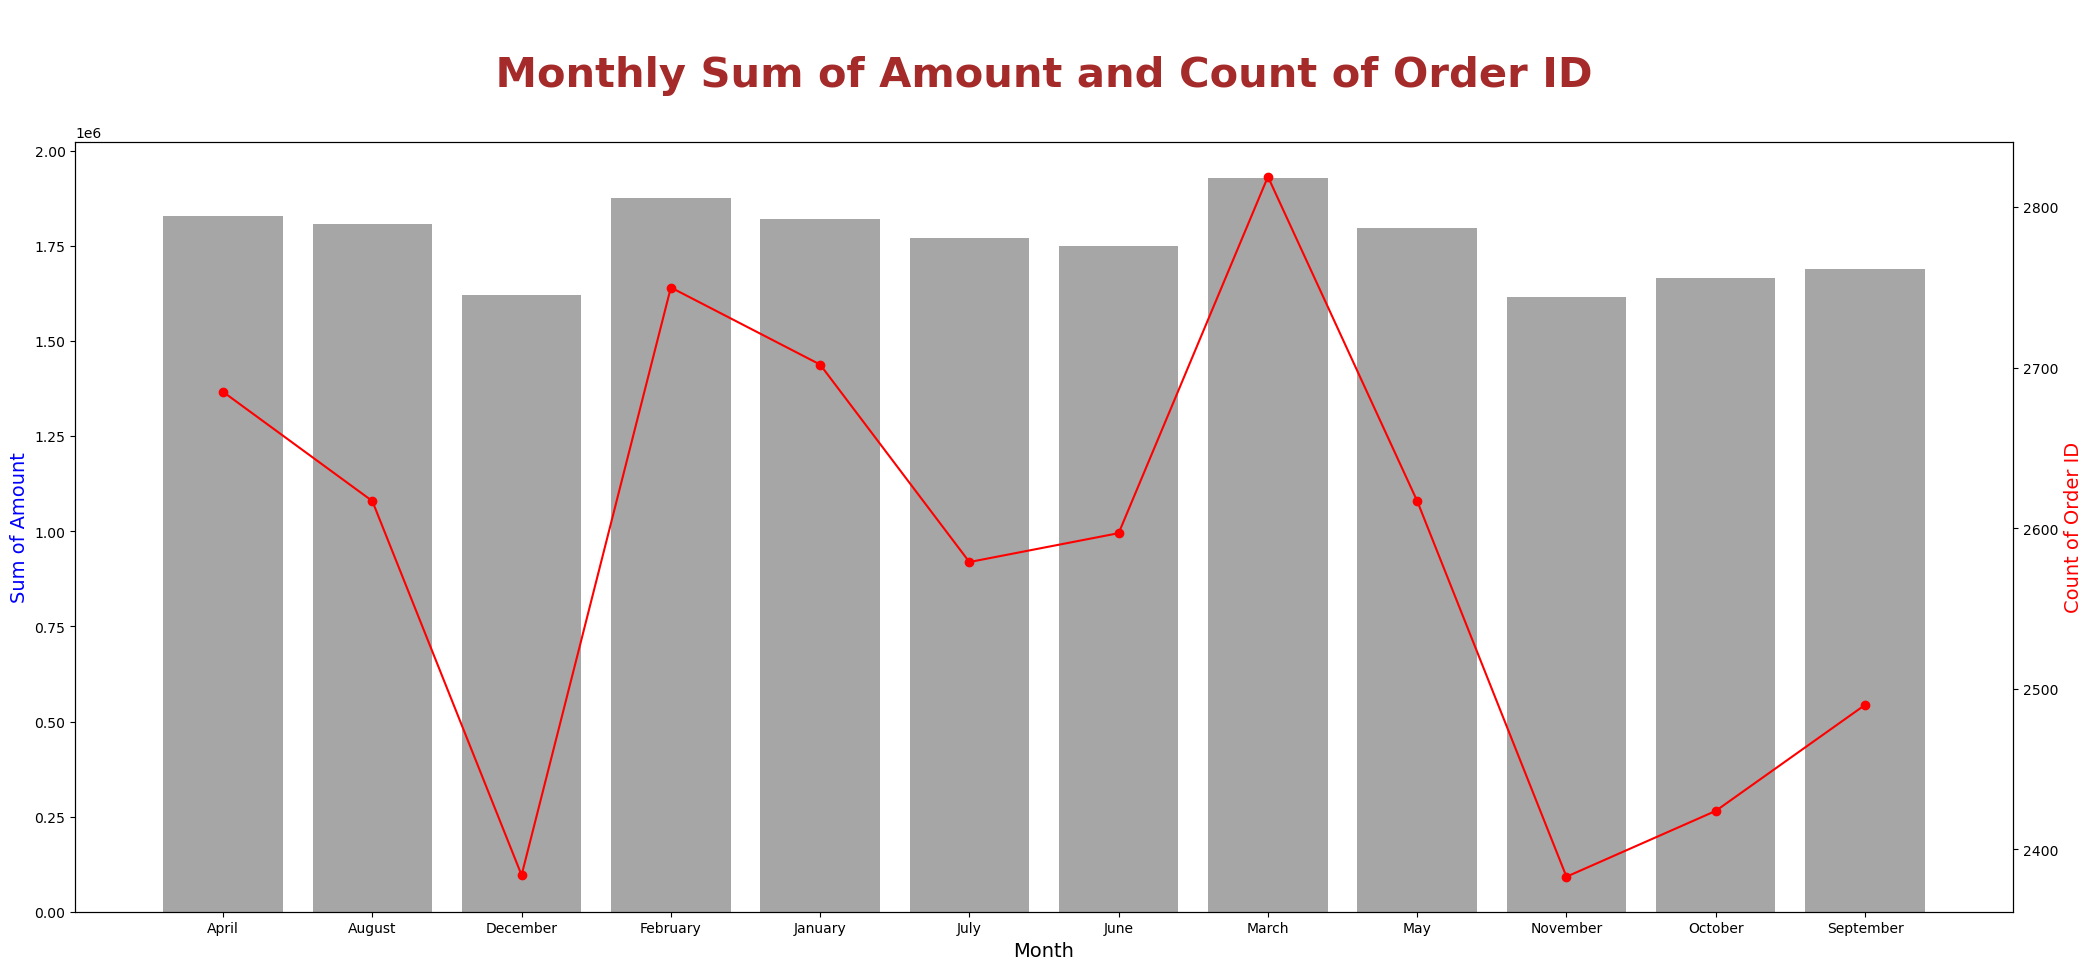

In [77]:
state_amount_sum = cv.groupby('ship-state')['Amount'].sum()
plt.figure(figsize = (25,10))

monthly_data = cv.groupby(cv["Date"].dt.month_name()).agg({'Amount': 'sum', 'Order ID': 'count'})

plt.bar(monthly_data.index.astype(str), monthly_data['Amount'], color = 'gray', alpha = 0.7)
plt.xlabel('Month',fontdict={"fontsize": 14, "color": "Black"})
plt.ylabel('Sum of Amount', fontdict={"fontsize": 14, "color": "blue"})

plt.twinx()
plt.plot(monthly_data.index.astype(str), monthly_data['Order ID'], color = 'r', marker = 'o')
plt.ylabel('Count of Order ID', fontdict={"fontsize": 14, "color": "red"})

plt.title('\n Monthly Sum of Amount and Count of Order ID \n',fontdict={"fontsize": 30, "fontweight": "bold", "color": "brown"})
plt.show()

This code plots two sets of data on the same figure.
- The first set of data represents the total amount of sales for each month.
- The second set of data represents the number of orders placed in each month. 

The use of a secondary y-axis (plt.twinx()) allows both sets of data to be plotted on the same figure while maintaining separate y-axis scales. This enables easy comparison between the total sales amounts and the number of orders placed over each month.

#### Suggestions:
- Building strong relationships with customers and fostering loyalty is key to driving consistent sales growth throughout the year. By closely examining the EDA graph, we can identify recurring patterns or trends in sales performance across different months. During low-revenue periods, we can focus on nurturing existing customer relationships and providing exceptional customer service to maintain loyalty and mitigate revenue challenges. 
- To improve sales performance during months with lower revenue we can introduce seasonal or limited-edition products tailored to specific consumer preferences. To stimulate demand partnering with complementary brands can help us reach new audiences and drive incremental sales revenue, particularly during slower months.







## Conclusion
- Strength of the client analysis: Comprehensive understanding of customer demographics and preferences, identify top-selling apparel categories, and discern gender-specific purchasing patterns. Moreover, it offers insights into regional market dynamics, tier-wise sales distribution, and customer engagement strategies. Additionally, it facilitates analysis of ordered channels' contributions to overall revenue and monthly revenue trends, including spikes and dips, enabling informed decision-making for strategic business growth.

- The limitations would lie in its reliance on historical data, potentially missing out on real-time market shifts and future trends. Additionally, its scope may be narrow due to limited integration of external data sources, overlooking broader market dynamics and competitive factors. While EDA excels in descriptive analytics, there's potential to enhance its effectiveness with advanced predictive and prescriptive analytics techniques, providing deeper insights and more actionable recommendations for strategic decision-making.

- Data driven recommendations would be implementing customer-centric strategies, expand into tier 2 and tier 3 cities, enhance order fulfillment processes, diversify product offerings, forge strategic partnerships, and adopt agile marketing and sales strategies to drive growth and increase sales revenue.